In [8]:
import torch
import helper
from torchvision import datasets, transforms
#Define transform and normalize data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                               ])
#download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#downlaod and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [10]:
from torch import optim
from torch import nn
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [16]:
criterion = nn.NLLLoss()
model = Classifier()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses = []
test_losses = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        logps = model(images)
        loss = criterion(logps,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Accuracy: {:.3f}".format(accuracy/len(testloader))
             )

Epoch: 1/30..  Training Loss: 0.514..  Test Loss: 0.447..  Accuracy: 0.837
Epoch: 2/30..  Training Loss: 0.389..  Test Loss: 0.430..  Accuracy: 0.847
Epoch: 3/30..  Training Loss: 0.351..  Test Loss: 0.402..  Accuracy: 0.861
Epoch: 4/30..  Training Loss: 0.330..  Test Loss: 0.385..  Accuracy: 0.866
Epoch: 5/30..  Training Loss: 0.313..  Test Loss: 0.416..  Accuracy: 0.858
Epoch: 6/30..  Training Loss: 0.301..  Test Loss: 0.400..  Accuracy: 0.863
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.359..  Accuracy: 0.875
Epoch: 8/30..  Training Loss: 0.283..  Test Loss: 0.374..  Accuracy: 0.867
Epoch: 9/30..  Training Loss: 0.273..  Test Loss: 0.376..  Accuracy: 0.875
Epoch: 10/30..  Training Loss: 0.264..  Test Loss: 0.363..  Accuracy: 0.876
Epoch: 11/30..  Training Loss: 0.256..  Test Loss: 0.381..  Accuracy: 0.868
Epoch: 12/30..  Training Loss: 0.255..  Test Loss: 0.402..  Accuracy: 0.864
Epoch: 13/30..  Training Loss: 0.242..  Test Loss: 0.362..  Accuracy: 0.879
Epoch: 14/30..  Train

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

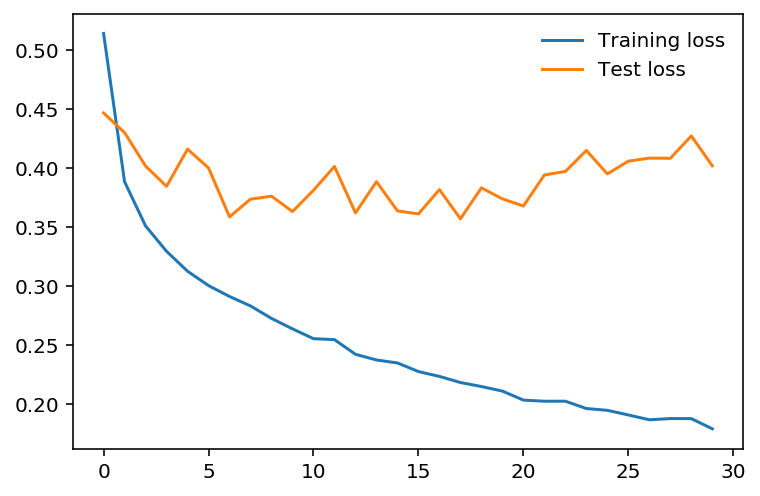

In [18]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend(frameon=False)

In [ ]:
#Overfitting
#The model can't generalize it knowledge